In [1]:
import pandas as pd

In [264]:
gi = pd.read_excel('giraffe.xlsx')

In [265]:
gi_orig_size = len(gi.index)
print(f'giraffe data has {gi_orig_size} rows')

giraffe data has 1582 rows


In [267]:
# drop irrelevant cols
gi = gi.drop(['IMAGE ID', 'INDIVIDUAL', 'CAMERA', 
             'CAMERA TEMPERATURE','MOONPHASE',
              'Direction (numerical)'], axis=1)

In [268]:
gi.Passage.unique()

array([0, 1, '*', 713, nan], dtype=object)

In [269]:
# drop missing data and outlier
gi = gi[(gi.Passage != '*') & (gi.Passage != 713)]
gi = gi[gi.Passage.isna() == False]

In [270]:
print('{:.2f}% of data remaining after filter on Passage'
      .format(len(gi.index) / gi_orig_size))

0.90% of data remaining after filter on Passage


In [271]:
gi.Passage.unique()

array([0, 1], dtype=object)

In [272]:
# convert to numeric
gi['Passage'] = gi['Passage'].astype(int)

In [274]:
gi.Passage.dtype

dtype('int64')

In [275]:
gi.DIRECTION.unique()

array([nan, 'IN', 'OUT', 'ALONG', 'UNKNOWN'], dtype=object)

In [276]:
# drop where DIRECTION = "Along"
gi = gi[gi.DIRECTION != 'ALONG']
print('{:.2f}% of data remaining after filter on DIRECTION != ALONG'
      .format(len(gi.index) / gi_orig_size))

0.81% of data remaining after filter on DIRECTION != ALONG


In [14]:
# drop missing HOUR values
gi = gi[gi.HOUR.isna() == False]
print('{:.2f}% of data remaining after filter on HOUR'
      .format(len(gi.index) / gi_orig_size))

0.36% of data remaining after filter on HOUR


Det fanns mycket saknade HOUR värden..

Alla gånger passage är 1 finns det en tid, men det finns inte en enda passage = 0 som faktiskt har en tid. Dvs det finns inga passage = 0 på något giltigt klockslag. se nedan

In [282]:
# bara en giltig passage som saknar tid
gi[(gi.Passage == 1) & (gi.HOUR.isna())]

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2
579,2016-11-30,november,NaN,NaN,NaN,NaN,0,0,NaN,1,1,NaN,0.0,20.0,1020.0,80.0,4.2,50.0,2016-11-30


In [285]:
# ger en tom frame
gi[(gi.Passage == 0) & (gi.HOUR.isna() == False)]

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2


In [289]:
print('antal Passage=0 och HOUR=NaN är {} rows'.format(
    len(gi[(gi.Passage == 0) & (gi.HOUR.isna() == True)].index)))

antal Passage=0 och HOUR=NaN är 710 rows


### Vilken tid på dygnet använder girafferna korridoren? Passage vs hour

In [15]:
# set hour to int
gi['HOUR'] = gi['HOUR'].astype(int)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [17]:
hour_group = gi.groupby('HOUR').sum()['Passage'].reset_index()

In [255]:
errs = gi.groupby('HOUR').std()['Passage']

In [263]:
len(gi[gi.Passage == 0].index)

0

Text(0.5, 1.0, 'Passages in either direction by hour')

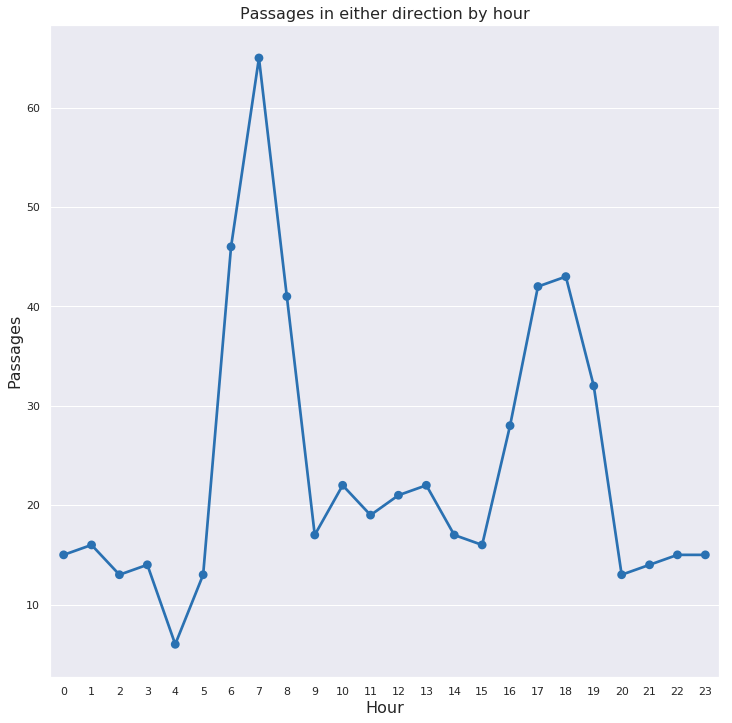

In [251]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by hour', fontsize=16)

### Hur många passager görs respektive månad? Passage vs månad

In [20]:
month_group = gi.groupby('DATE.1').sum()['Passage'].reset_index()

In [22]:
a = ['januari','februari','mars',
     'april','maj','juni','juli',
     'augusti','september','oktober',
     'november','december']

In [24]:
date_map = {month: i for i, month in enumerate(a)}

In [25]:
[x for x in month_group['DATE.1'].unique()]

['april',
 'augusti',
 'december',
 'februari',
 'januari',
 'juli',
 'juni',
 'maj',
 'mars',
 'november',
 'oktober',
 'september']

In [26]:
date_map = {month: i for i, month in enumerate(a)}

In [27]:
date_map

{'januari': 0,
 'februari': 1,
 'mars': 2,
 'april': 3,
 'maj': 4,
 'juni': 5,
 'juli': 6,
 'augusti': 7,
 'september': 8,
 'oktober': 9,
 'november': 10,
 'december': 11}

In [28]:
def add_month_digits(x):
    x['i'] = 0
    for month, i in date_map.items():
        x.loc[x['DATE.1'] == month, 'i'] = i
    return x

In [29]:
month_group = add_month_digits(month_group)

In [30]:
month_group = month_group.sort_values(by='i')

In [31]:
month_group

,DATE.1,Passage,i
4,januari,38,0
3,februari,25,1
8,mars,39,2
0,april,34,3
7,maj,12,4
6,juni,42,5
5,juli,75,6
1,augusti,53,7
11,september,41,8
10,oktober,98,9


In [112]:
month_names = ['January','February','March',
               'April','May','June','July',
               'August','September','October',
               'November','December']

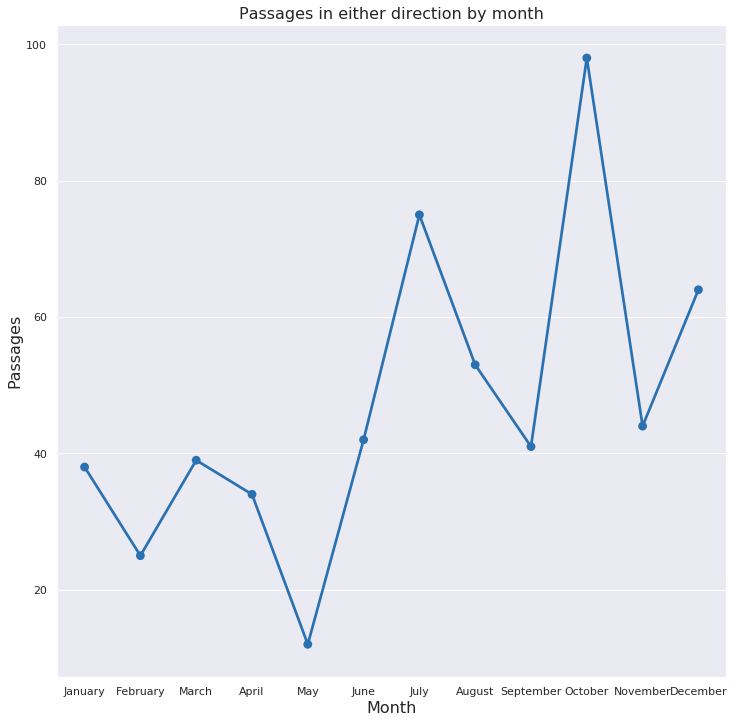

In [113]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by month', fontsize=16)
_=ax.set_xticklabels(month_names)

### Vilken tid på dygnet går de in? In/direction vs hour

In [33]:
in_group = gi[gi.DIRECTION == 'IN'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going in by hour')

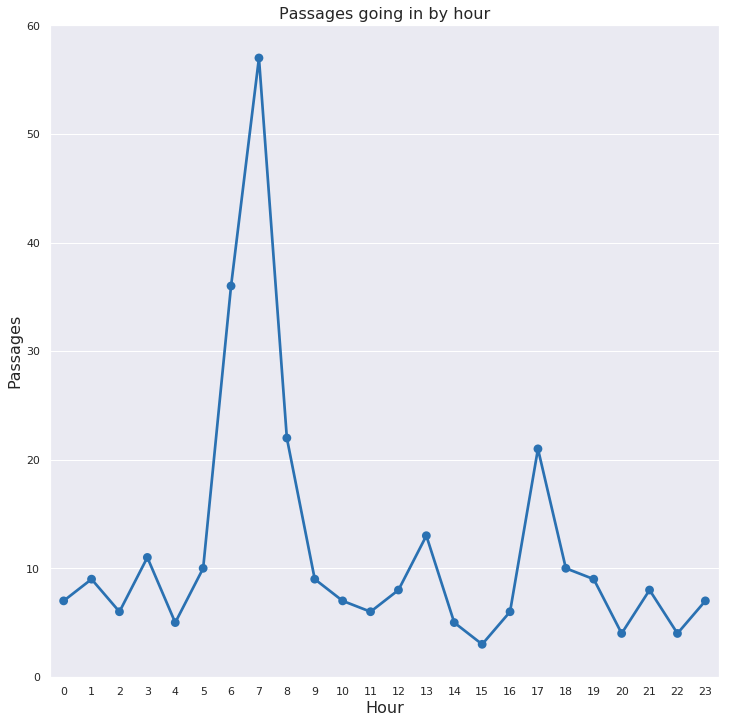

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going in by hour', fontsize=16)

### Vilken tid på dygnet går de in? In/direction vs hour

In [35]:
out_group = gi[gi.DIRECTION == 'OUT'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going out by hour')

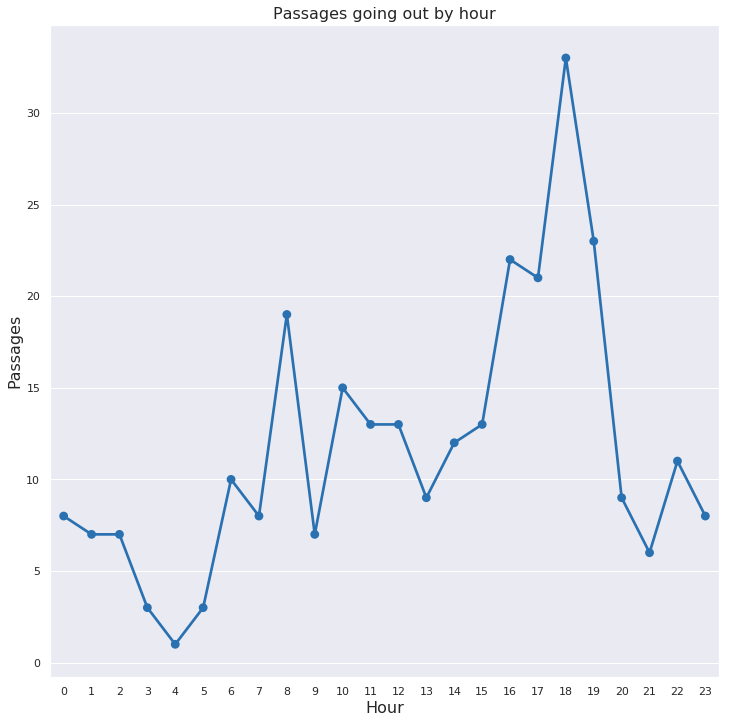

In [87]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0], ci='sd')
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going out by hour', fontsize=16)

### Det kanske går att göra en graf med tre variabler både för in, ut och timme?

In [37]:
import matplotlib.patches as mpatches

In [239]:
direction_group = gi[(gi.DIRECTION == 'IN') | (gi.DIRECTION == 'OUT')].groupby(['HOUR', 'DIRECTION']).sum()['Passage'].reset_index()

In [240]:
both_group = direction_group.copy()

In [241]:
both_group = both_group.groupby('HOUR').sum()['Passage'].reset_index()

In [243]:
both_group['DIRECTION'] = 'EITHER'

In [244]:
both_group = both_group[['HOUR', 'DIRECTION', 'Passage']]

In [245]:
both_group = direction_group.append(both_group)

In [247]:
both_group['DIRECTION'] = both_group['DIRECTION'].str.title()

Text(0.5, 1.0, 'Passages by hour')

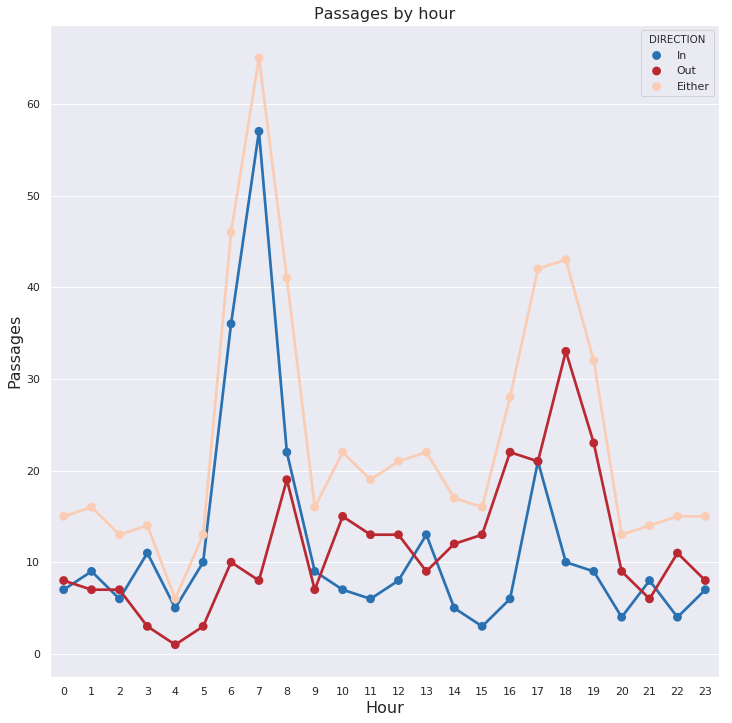

In [249]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=both_group, palette=[palette[0], palette[-1], palette[4]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

In [170]:
direction_group.head()

,HOUR,DIRECTION,Passage
0,0,IN,7
1,0,OUT,8
2,1,IN,9
3,1,OUT,7
4,2,IN,6


In [50]:
# drop SEX missing values
gi = gi[gi['SEX'].isna() == False]

In [200]:
sex_group = gi.groupby(['HOUR', 'SEX']).sum()['Passage'].reset_index()

In [201]:
sex_all = sex_group.copy()
sex_all = sex_all.groupby('HOUR').sum()['Passage'].reset_index()
sex_all['SEX'] = 'ALL'
sex_all = sex_all[['HOUR', 'SEX', 'Passage']]
sex_all = sex_all.append(sex_group)

In [203]:
sex_all.head()

,HOUR,SEX,Passage
0,0,ALL,15
1,1,ALL,16
2,2,ALL,13
3,3,ALL,14
4,4,ALL,6


In [212]:
sex_all.loc[sex_all.SEX == 'U', 'SEX'] = 'Unknown'
sex_all.loc[sex_all.SEX == 'M', 'SEX'] = 'Male'
sex_all.loc[sex_all.SEX == 'F', 'SEX'] = 'Female'
sex_all.loc[sex_all.SEX == 'ALL', 'SEX'] = 'All'

Text(0.5, 1.0, 'Passages by hour')

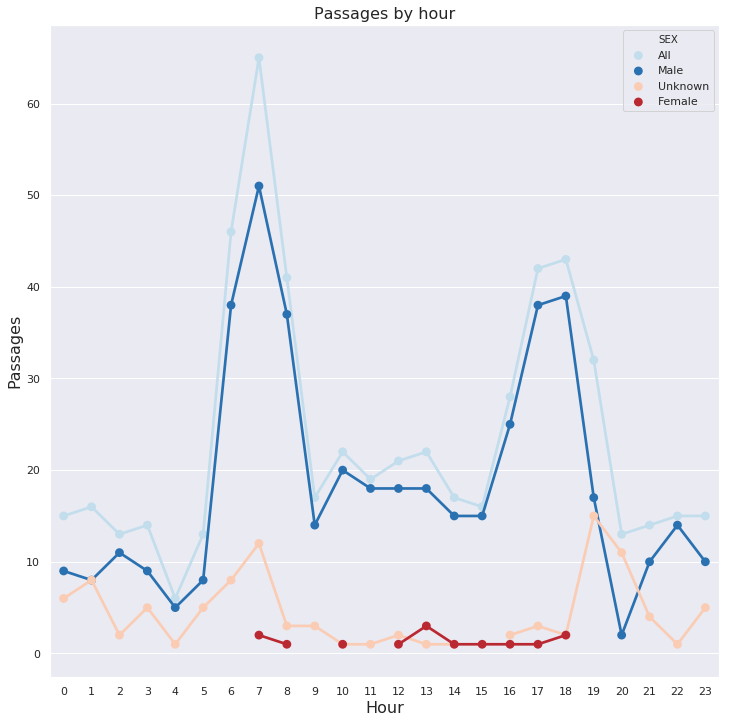

In [213]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_all, palette=[palette[2], palette[0], 
                                     palette[4], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

### Hur många djur använder korridoren samtidigt? Passage vs group size

In [53]:
gi['GROUP SIZE'] = gi['GROUP SIZE'].astype(int)

In [54]:
group_size = gi.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [55]:
group_size

,GROUP SIZE,Passage
0,1,402
1,2,91
2,3,28
3,4,14
4,5,24
5,6,6


In [57]:
male_group_size = gi[(gi['SEX'] == 'M') & (gi['GROUP SIZE'] <= 3)]\
.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [58]:
male_group_size

,GROUP SIZE,Passage
0,1,322
1,2,73
2,3,26


Båda på samma plot:

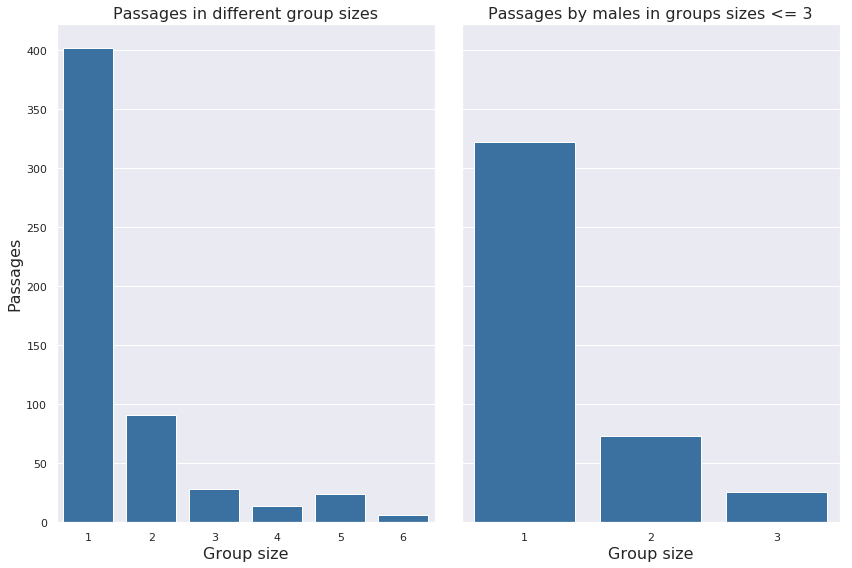

In [80]:
fig, axes = plt.subplots(1,2,figsize=(12,8), sharey=True)
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=axes[0], color=palette[0])
axes[0].set_xlabel('Group size', fontsize=16)
axes[0].set_ylabel('Passages', fontsize=16)
axes[0].set_title('Passages in different group sizes', fontsize=16)

sns.barplot(x='GROUP SIZE', y='Passage', 
            data=male_group_size, ax=axes[1], color=palette[0])
axes[1].set_xlabel('Group size', fontsize=16)
axes[1].set_ylabel('')
axes[1].set_title('Passages by males in groups sizes <= 3', fontsize=16)

plt.tight_layout()

Text(0.5, 1.0, 'Passages in different group sizes')

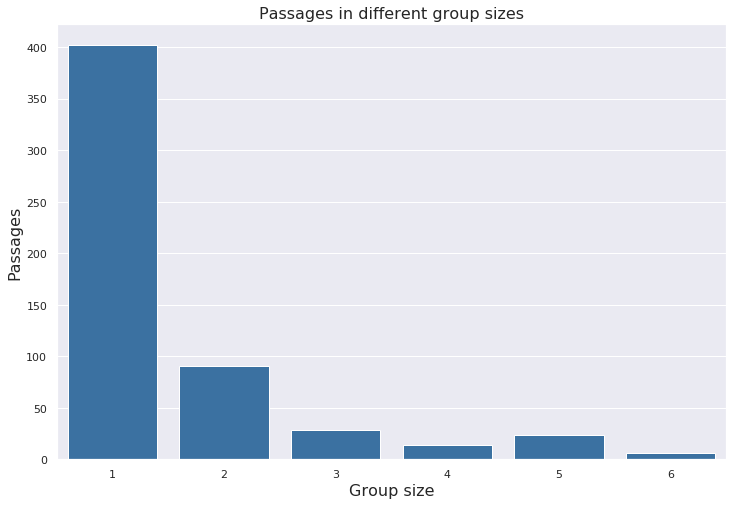

In [85]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

### Hur många passager utgörs av ensamma handjur eller hanar i grupper om 3 eller färre? Dvs group size ≤3 där alla individer är hanar ”sex=M”, alternativt sex=U men det blir kanske för osäkert.

Text(0.5, 1.0, 'Passages by males in groups sizes <= 3')

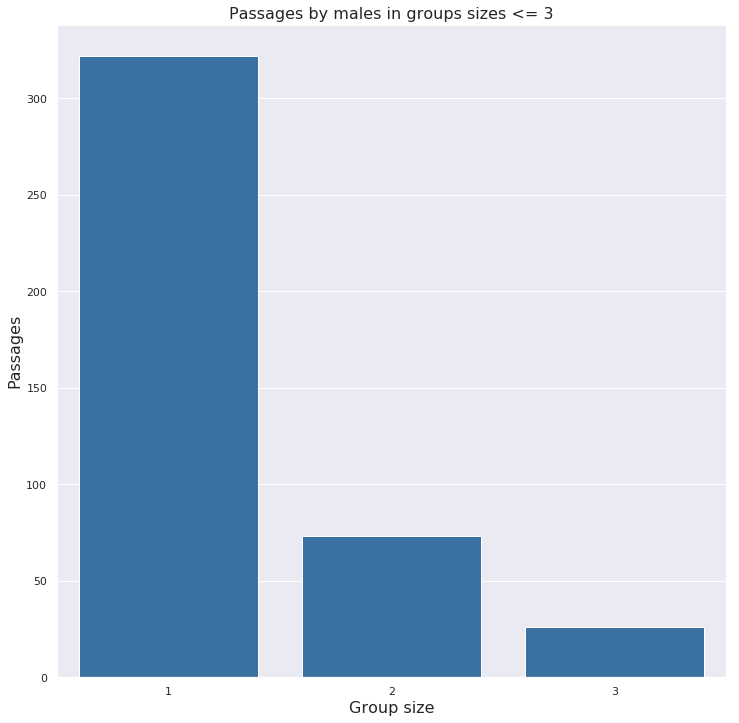

In [59]:
fig, ax = plt.subplots(figsize=(12,12))


### Heatmap of hour+month vs passage

In [125]:
hour_month = gi.groupby(['DATE.1', 'HOUR'], sort=False).sum()['Passage'].reset_index()

In [126]:
hour_month = add_month_digits(hour_month)

In [127]:
hour_month = hour_month.sort_values(by=['i','HOUR'])

In [128]:
hour_month.head()

,DATE.1,HOUR,Passage,i
119,januari,0,2,0
20,januari,1,3,0
176,januari,2,1,0
19,januari,3,2,0
120,januari,4,2,0


In [129]:
hour_month = hour_month[['i', 'HOUR', 'Passage']]

In [130]:
hour_month = hour_month.rename(index=str, 
                               columns={"i": "Month", 
                                        "HOUR": "Hour"})

In [96]:
pivoted = hour_month.pivot('Hour', 'Month', 'Passage')

In [97]:
pivoted.fillna(0, inplace=True)

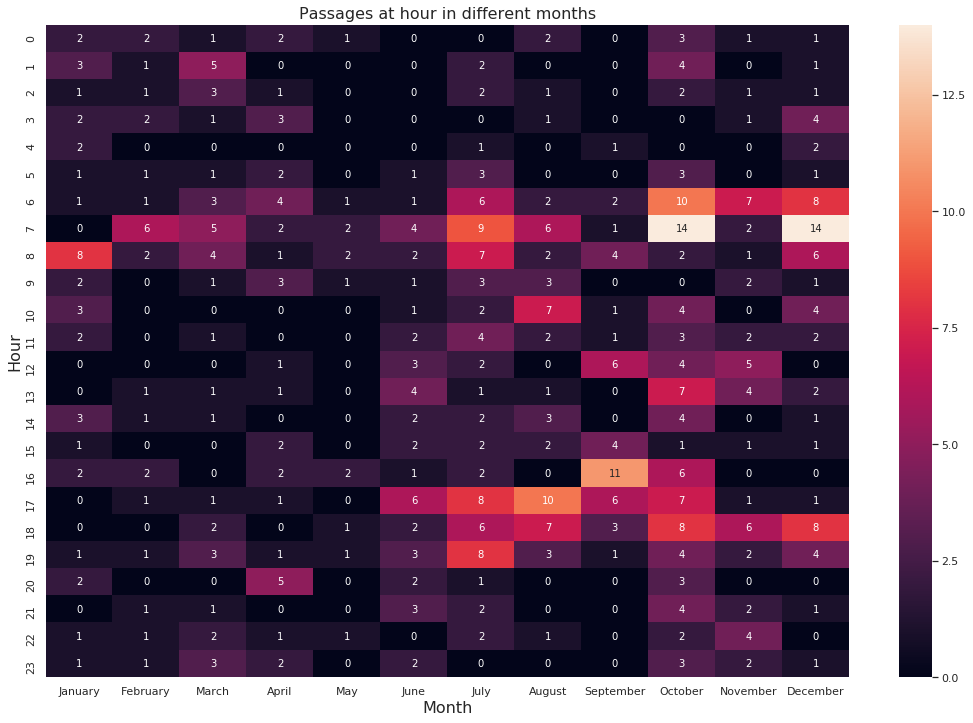

In [99]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(pivoted, ax=ax, annot=True)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Hour', fontsize=16)
ax.set_title('Passages at hour in different months', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

In [88]:
!pip install joypy

In [102]:
import joypy

In [100]:
hour_month.head()

,Month,Hour,Passage
119,0,0,2
20,0,1,3
176,0,2,1
19,0,3,2
120,0,4,2


In [124]:
month_names

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [131]:
hour_month = hour_month.rename(index=str, columns={'Month': 'month_id'})

In [133]:
def add_month_names(x):
    x['Month'] = ''
    for i, month in enumerate(month_names):
        x.loc[x['month_id'] == i, 'Month'] = month
    return x

In [134]:
hour_month = add_month_names(hour_month)

<Figure size 1920x1920 with 0 Axes>

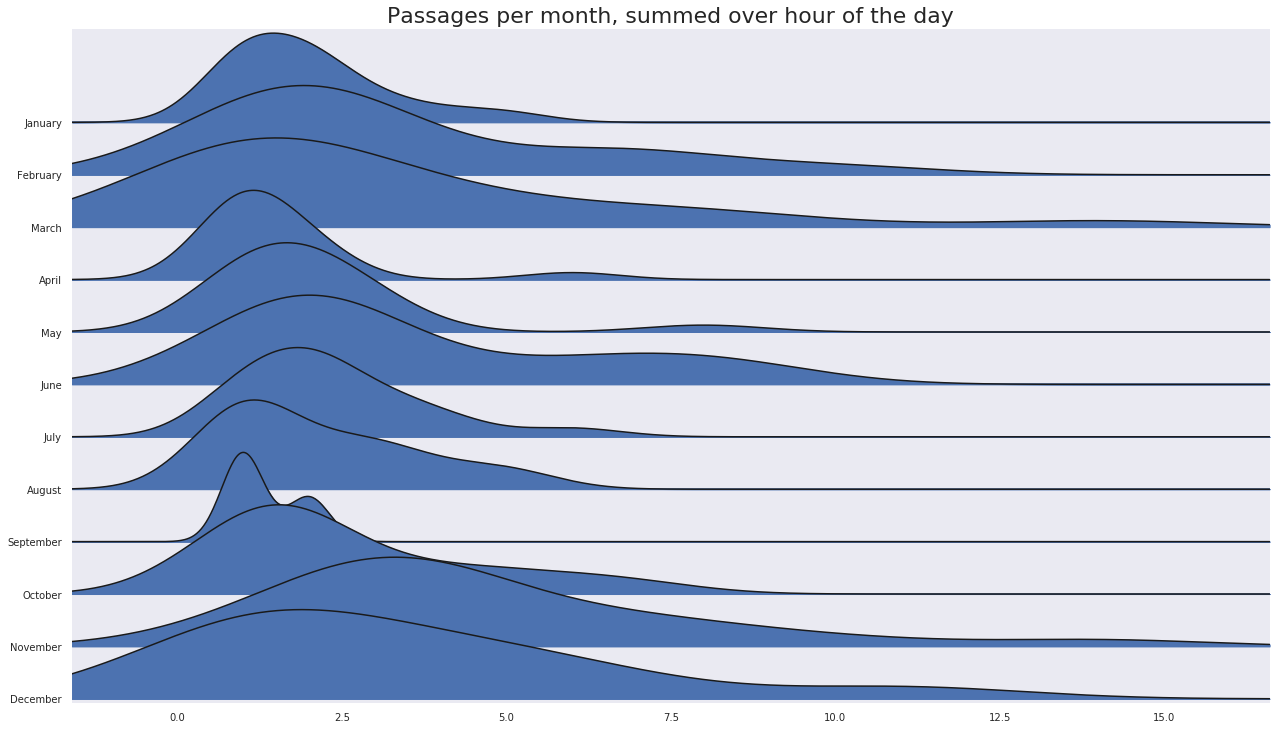

<Figure size 432x288 with 0 Axes>

In [167]:
plt.figure(figsize=(24,24), dpi=80)
fig, axes = joypy.joyplot(hour_month, 
                          column=['Passage'], 
                          by=['Month'], 
                          ylim='own',
                          figsize=(18,10),
                          labels=month_names)

# Decoration
#[ax.set_yticklabels(m) for ax, m in zip(axes, month_names)]
#axes[-3].set_xlabel('Hour', fontsize=16)
#axes[-1].set_ylabel('Passages', fontsize=16)
plt.title('Passages per month, summed over hour of the day', fontsize=22)
plt.show()
plt.tight_layout()

<Figure size 1440x800 with 0 Axes>

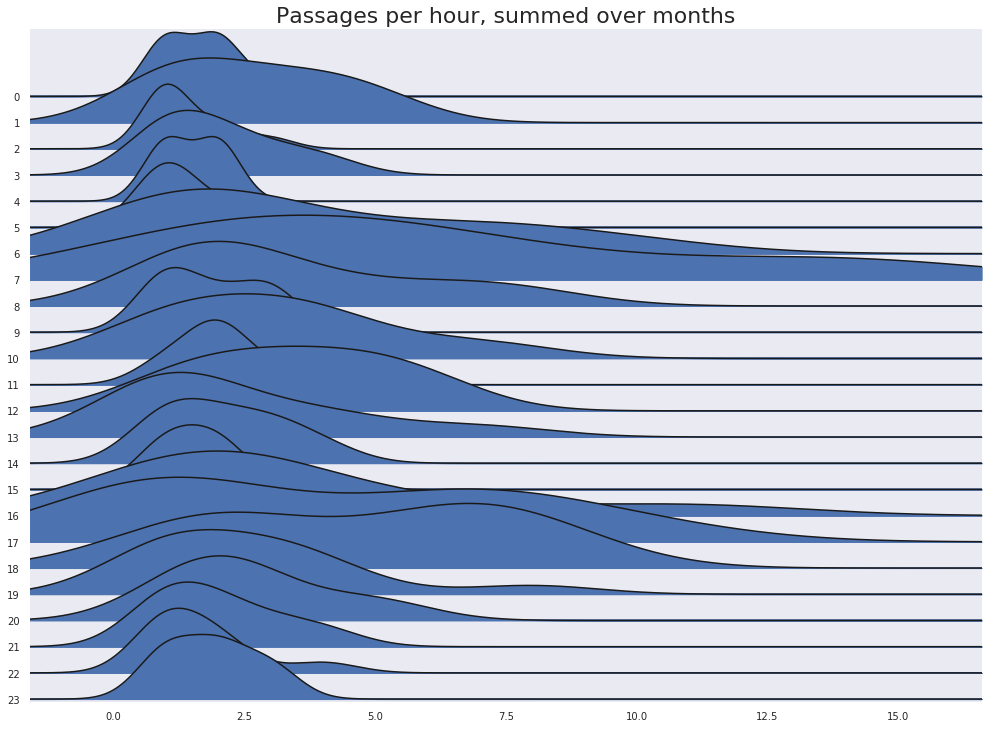

In [162]:
%matplotlib inline
plt.figure(figsize=(18,10), dpi= 80)
fig, axes = joypy.joyplot(hour_month, 
                          column=['Passage'], 
                          by="Hour", 
                          ylim='own', 
                          figsize=(14,10))

# Decoration
axes[-3].set_xlabel('Hour', fontsize=16)
axes[-1].set_ylabel('Passages', fontsize=16)
plt.title('Passages per hour, summed over months', fontsize=22)
plt.show()

In [70]:
xls = pd.ExcelFile('weather.xlsx')
we = pd.read_excel(xls, 'Daily Weather')

In [71]:
gi.head()

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2
2,2015-10-03,oktober,2.0,7,M,IN,1,0,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
3,2015-10-03,oktober,2.0,13,M,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
4,2015-10-03,oktober,2.0,13,U,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
5,2015-10-04,oktober,2.0,8,M,IN,1,0,1,1,1,NaN,0.7,22.0,1020.0,60.0,4.7,50.0,2015-10-04
12,2015-10-11,oktober,2.0,20,M,OUT,0,1,1,1,1,NaN,0.0,22.0,1020.0,60.0,4.1,50.0,2015-10-11


In [72]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 24,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,18.0,12.0,11.0,10.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,18.0,13.0,11.0,10.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,18.0,14.0,11.0,10.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,18.0,15.0,11.0,10.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,18.0,16.0,12.0,10.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [73]:
we = we.rename(index=str, columns={"Date": "DATE"})

In [ ]:
we_n.columns